# One:
Register an app to get needed credentials ► https://developer.twitter.com/en/portal/petition/verification

Go to your App and generate an access token

Searching about chirptocurrencies

In [65]:
import tweepy
import json
import pandas as pd
from pandas.io.json import json_normalize 

In [66]:
# keys here

In [67]:
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [68]:
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [69]:
data = api.me()

In [70]:

# function to convert _json to JSON
def jsonify_tweepy(tweepy_object):
    json_str = json.dumps(tweepy_object._json)
    return json.loads(json_str)

# function to get extended retweets
def jsonify_tweepy_2(tweet_info):

    if "retweeted_status" in dir(tweet_info):
      return tweet_info.retweeted_status.full_text
    else:
      return tweet_info.full_text

# df.iloc[row][col]

## Tweets from the word "bitcoin"

In [71]:
criptocurrency_tweets = list(tweepy.Cursor(api.user_timeline, screen_name="bitcoin", tweet_mode="extended").items(1000))

In [72]:
criptocurrency_df = json_normalize([jsonify_tweepy(tweet) for tweet in criptocurrency_tweets])
criptocurrency_df.full_text = pd.DataFrame([jsonify_tweepy_2(tweet) for tweet in criptocurrency_tweets])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


In [73]:
criptocurrency_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,entities.hashtags,entities.symbols,entities.user_mentions,entities.urls,user.id,user.id_str,user.name,user.screen_name,user.location,user.description,user.url,user.entities.url.urls,user.entities.description.urls,user.protected,user.followers_count,user.friends_count,user.listed_count,user.created_at,...,quoted_status.user.has_extended_profile,quoted_status.user.default_profile,quoted_status.user.default_profile_image,quoted_status.user.following,quoted_status.user.follow_request_sent,quoted_status.user.notifications,quoted_status.user.translator_type,quoted_status.geo,quoted_status.coordinates,quoted_status.place,quoted_status.contributors,quoted_status.is_quote_status,quoted_status.retweet_count,quoted_status.favorite_count,quoted_status.favorited,quoted_status.retweeted,quoted_status.lang,retweeted_status.quoted_status.quoted_status_id,retweeted_status.quoted_status.quoted_status_id_str,retweeted_status.quoted_status.quoted_status_permalink.url,retweeted_status.quoted_status.quoted_status_permalink.expanded,retweeted_status.quoted_status.quoted_status_permalink.display,quoted_status.possibly_sensitive,quoted_status.entities.media,quoted_status.extended_entities.media,retweeted_status.place.id,retweeted_status.place.url,retweeted_status.place.place_type,retweeted_status.place.name,retweeted_status.place.full_name,retweeted_status.place.country_code,retweeted_status.place.country,retweeted_status.place.contained_within,retweeted_status.place.bounding_box.type,retweeted_status.place.bounding_box.coordinates,quoted_status.quoted_status_id,quoted_status.quoted_status_id_str,quoted_status.quoted_status_permalink.url,quoted_status.quoted_status_permalink.expanded,quoted_status.quoted_status_permalink.display
0,Sat Feb 20 19:40:23 +0000 2021,1363211917574119424,1363211917574119424,Would you buy #Bitcoin?,False,"[0, 23]","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,None,None,None,None,None,False,190,627,False,False,en,"[{'text': 'Bitcoin', 'indices': [14, 22]}]",[],[],[],357312062,357312062,Bitcoin,Bitcoin,Worldwide,Bitcoin is an open source censorship-resistant...,https://t.co/foKG3v5VuE,"[{'url': 'https://t.co/foKG3v5VuE', 'expanded_...",[],False,1482865,70,9255,Thu Aug 18 05:06:08 +0000 2011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sat Feb 20 17:24:43 +0000 2021,1363177779257176068,1363177779257176068,"$57,250.",False,"[0, 8]","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,None,None,None,None,None,False,1050,8382,False,False,und,[],[],[],[],357312062,357312062,Bitcoin,Bitcoin,Worldwide,Bitcoin is an open source censorship-resistant...,https://t.co/foKG3v5VuE,"[{'url': 'https://t.co/foKG3v5VuE', 'expanded_...",[],False,1482865,70,9255,Thu Aug 18 05:06:08 +0000 2011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sat Feb 20 00:47:34 +0000 2021,1362926836838133762,1362926836838133762,❤️🙏 https://t.co/kevyUfegn4,False,"[0, 45]","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,None,None,None,None,None,True,55,0,False,False,und,[],[],"[{'screen_name': 'CaitlinLong_', 'name': 'Cait...","[{'url': 'https://t.co/kevyUfegn4', 'expanded_...",357312062,357312062,Bitcoin,Bitcoin,Worldwide,Bitcoin is an open source censorship-resistant...,https://t.co/foKG3v5VuE,"[{'url': 'https://t.co/foKG3v5VuE', 'expanded_...",[],False,1482865,70,9255,Thu Aug 18 05:06:08 +0000 2011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [74]:
criptocurrency_df.info

<bound method DataFrame.info of                          created_at  ...  quoted_status.quoted_status_permalink.display
0    Sat Feb 20 19:40:23 +0000 2021  ...                                            NaN
1    Sat Feb 20 17:24:43 +0000 2021  ...                                            NaN
2    Sat Feb 20 00:47:34 +0000 2021  ...                                            NaN
3    Sat Feb 20 00:47:27 +0000 2021  ...                                            NaN
4    Fri Feb 19 18:31:19 +0000 2021  ...                                            NaN
..                              ...  ...                                            ...
995  Sun Mar 29 02:44:06 +0000 2020  ...                                            NaN
996  Sat Mar 28 22:00:17 +0000 2020  ...                                            NaN
997  Sat Mar 28 20:36:13 +0000 2020  ...                                            NaN
998  Sat Mar 28 20:36:09 +0000 2020  ...                                            NaN


In [75]:
criptocurrency_df.to_csv(r'btc_df.csv')

## Executing sentiment analisis

In [76]:
!pip install langdetect

In [77]:
#import pandas as pd
#import tweepy
import matplotlib.pyplot as plt
from textblob import TextBlob
import re
import numpy as np
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [78]:
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [79]:
# Loading the info
#tweets_full_info = pd.read_csv("potholes_df1.csv")
tweets_full_info = criptocurrency_df

In [80]:
tweets = tweets_full_info.full_text

In [81]:
# For the new dataframe columns
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

In [82]:
def percentage(part,whole):
    return 100 * float(part)/float(whole)

In [83]:
noOfTweet = 1000

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet)
    analysis = TextBlob(tweet)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [84]:
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  1000
positive number:  419
negative number:  192
neutral number:  389


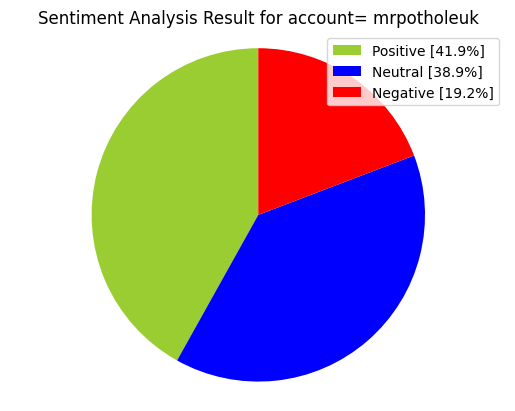

In [85]:
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for account= mrpotholeuk" )
plt.axis('equal')
plt.show()

In [86]:
tweet_list.drop_duplicates(inplace = True)

In [87]:

tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,Would you buy #Bitcoin?,Would you buy #Bitcoin?
1,"$57,250.","$57,250."
2,❤️🙏 https://t.co/kevyUfegn4,❤️🙏 https://t.co/kevyUfegn4
3,"$56,250.","$56,250."
4,https://t.co/x1deChsaFX,https://t.co/x1deChsaFX
...,...,...
995,Who funds Bitcoin development?\n\nWe analyse t...,Who funds Bitcoin development?\n\nWe analyse t...
996,A different era. \n\nBut the same. \n\nHODL. h...,A different era. \n\nBut the same. \n\nHODL. h...
997,What in the world is happening to our money?,What in the world is happening to our money?
998,Today's Bitcoin VR meetup features @PeterMcCor...,Today's Bitcoin VR meetup features @PeterMcCor...


In [88]:
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,Would you buy #Bitcoin?,would you buy bitcoin
1,"$57,250.",57 250
2,❤️🙏 https://t.co/kevyUfegn4,
3,"$56,250.",56 250
4,https://t.co/x1deChsaFX,
5,https://t.co/ooTMMWEUPq,
6,"$55,000.\n\nAnd the bull began his run. https:...",55 000 and the bull began his run
7,"$53,385.\n\nOn March 13, 2020 #Bitcoin dipped ...",53 385 on march 13 2020 bitcoin dipped be...
8,India trying to ban bitcoin is a huge mistake....,india trying to ban bitcoin is a huge mistake ...
9,It is simple. In the old world your money lose...,it is simple in the old world your money lose...


In [89]:
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,Would you buy #Bitcoin?,would you buy bitcoin,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
1,"$57,250.",57 250,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
2,❤️🙏 https://t.co/kevyUfegn4,,0.000000,0.000000,neutral,0.000,0.000,0.000,0.0000
3,"$56,250.",56 250,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
4,https://t.co/x1deChsaFX,,0.000000,0.000000,neutral,0.000,0.000,0.000,0.0000
5,https://t.co/ooTMMWEUPq,,0.000000,0.000000,neutral,0.000,0.000,0.000,0.0000
6,"$55,000.\n\nAnd the bull began his run. https:...",55 000 and the bull began his run,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
7,"$53,385.\n\nOn March 13, 2020 #Bitcoin dipped ...",53 385 on march 13 2020 bitcoin dipped be...,0.283333,0.291667,positive,0.000,0.949,0.051,0.2263
8,India trying to ban bitcoin is a huge mistake....,india trying to ban bitcoin is a huge mistake ...,0.050000,0.700000,neutral,0.125,0.750,0.125,0.0000
9,It is simple. In the old world your money lose...,it is simple in the old world your money lose...,-0.042695,0.412744,positive,0.083,0.829,0.088,0.0772


In [90]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [91]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [92]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
positive,429,43.6
neutral,368,37.4
negative,187,19.0


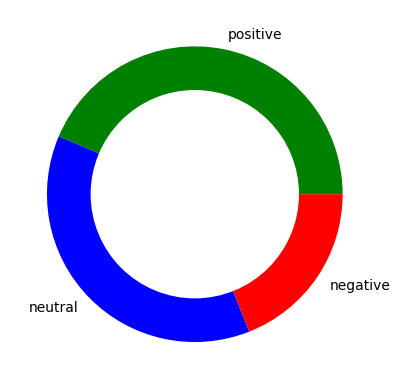

In [93]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [94]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


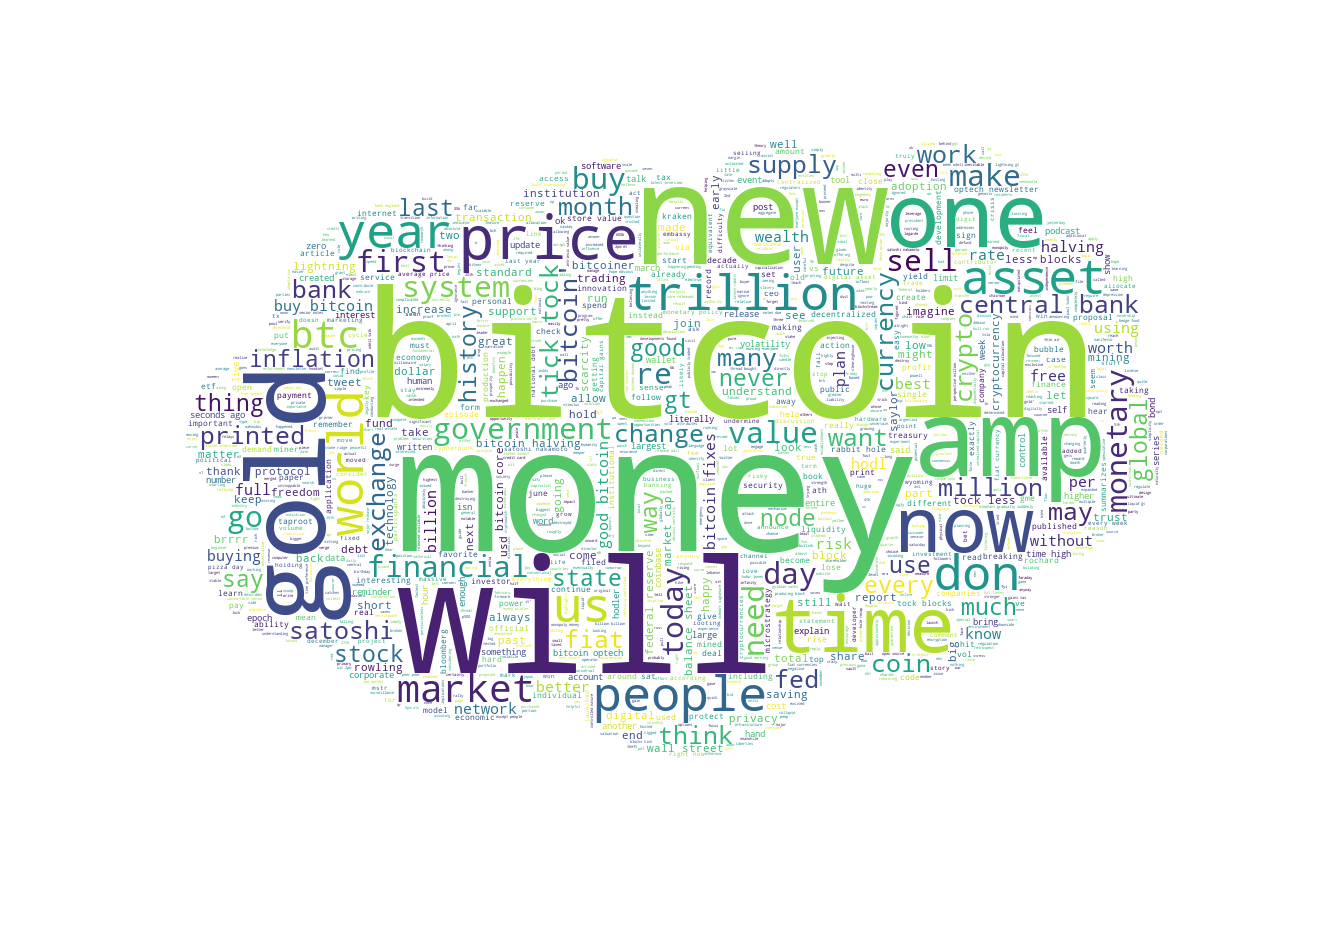

In [95]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


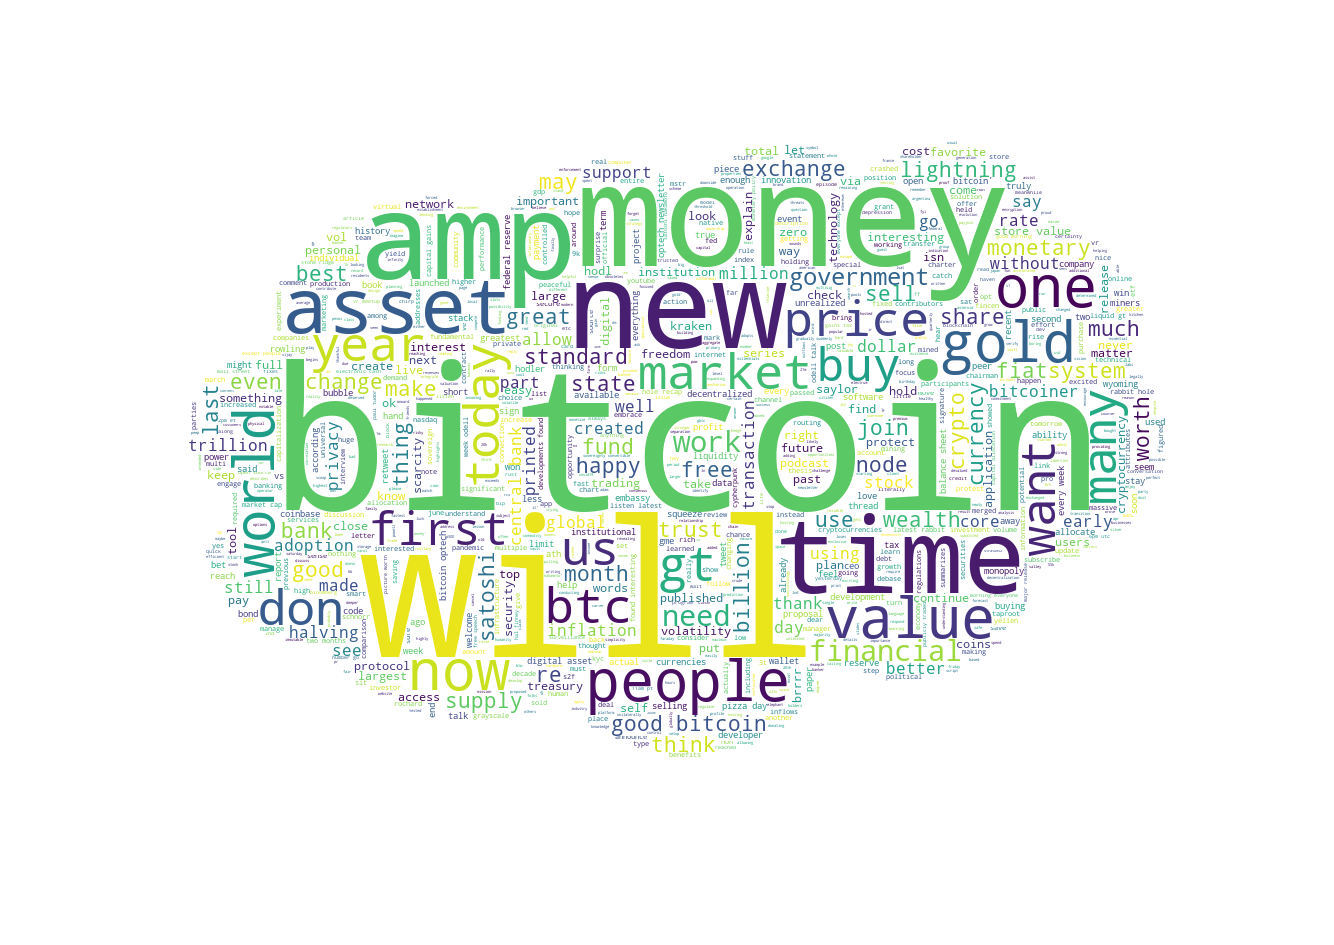

In [96]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


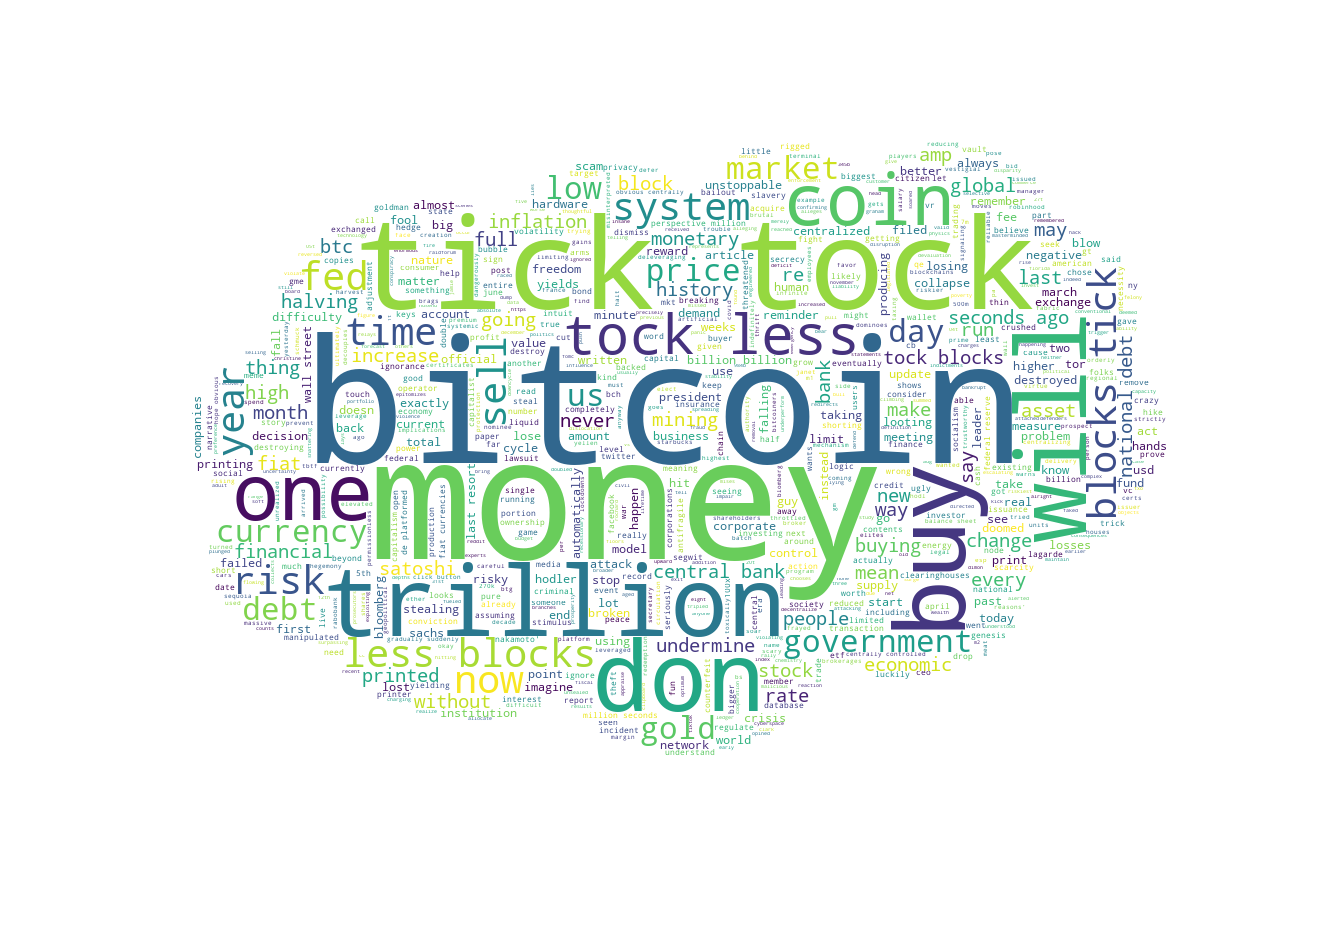

In [97]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


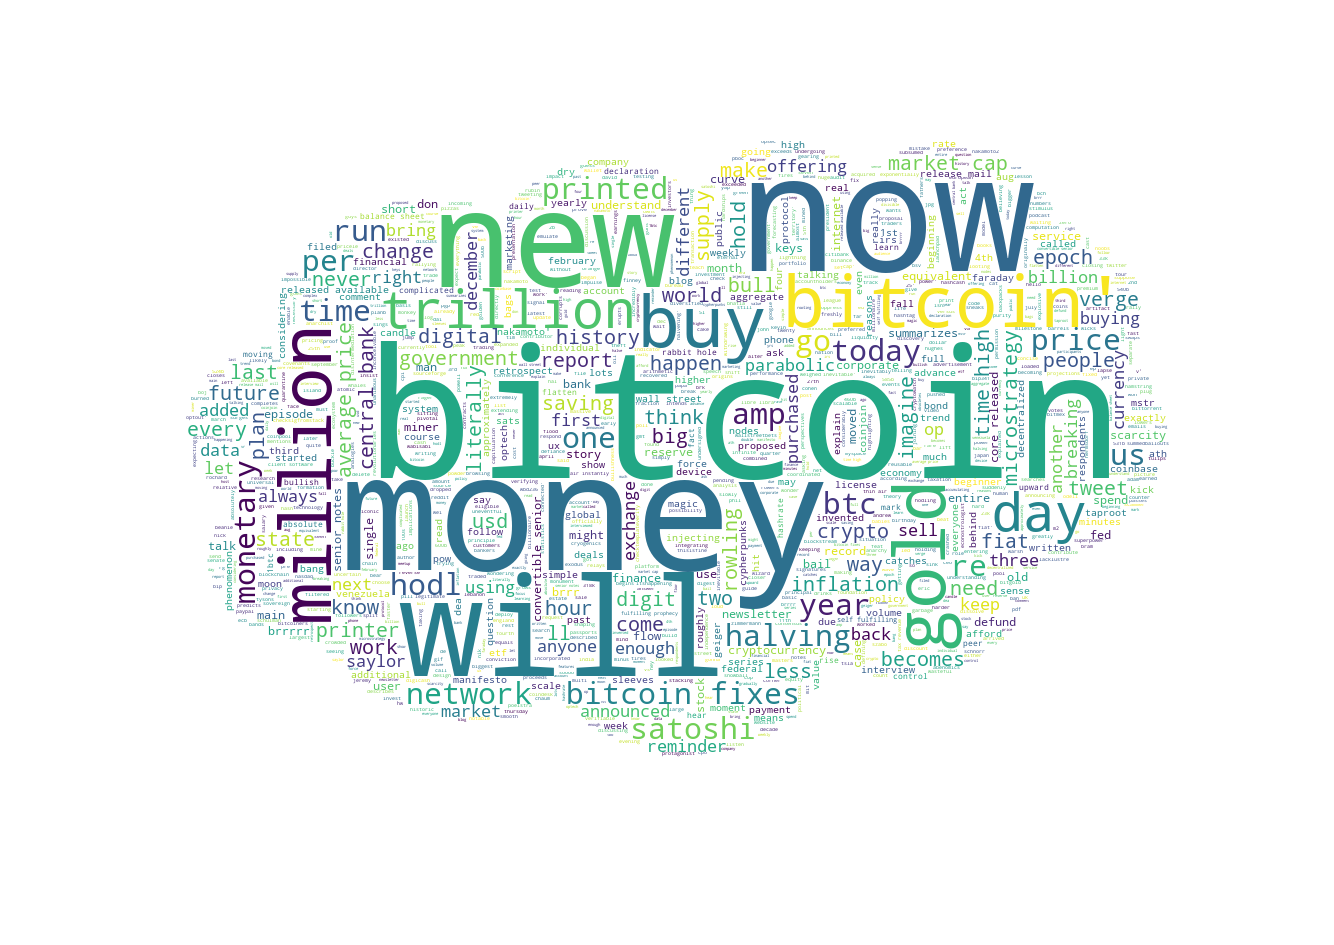

In [98]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)

In [99]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [100]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,142.43
neutral,56.39
positive,150.61


In [101]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,24.44
neutral,9.50
positive,24.83


In [102]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [103]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [104]:

#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [105]:

#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [106]:

#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [107]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,Would you buy #Bitcoin?,would you buy bitcoin,0.0,0.0,neutral,0.0,1.0,0.0,0.0,23,4,would you buy bitcoin,"[would, you, buy, bitcoin, ]","[would, buy, bitcoin, ]","[would, buy, bitcoin, ]"
1,"$57,250.",57 250,0.0,0.0,neutral,0.0,1.0,0.0,0.0,8,2,,"[, ]","[, ]","[, ]"
2,❤️🙏 https://t.co/kevyUfegn4,,0.0,0.0,neutral,0.0,0.0,0.0,0.0,5,0,,"[, ]","[, ]","[, ]"
3,"$56,250.",56 250,0.0,0.0,neutral,0.0,1.0,0.0,0.0,8,2,,"[, ]","[, ]","[, ]"
4,https://t.co/x1deChsaFX,,0.0,0.0,neutral,0.0,0.0,0.0,0.0,1,0,,"[, ]","[, ]","[, ]"


In [108]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

984 Number of reviews has 2644 words


In [109]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,abenom,abil,abl,absolut,abus,academ,acceler,accept,access,accident,accolad,accommod,accompani,accomplish,accord,account,accounthold,accumul,accur,achiev,ack,acquir,act,action,activ,activist,actual,ad,adam,adapt,add,addit,address,adjust,admir,admit,adopt,adult,advanc,...,worker,world,worldwid,wors,worst,worth,would,wow,wrapper,wrestl,write,writer,written,wrong,wrote,wyom,x,yale,yap,ye,year,yearli,yellen,yesterday,yet,yield,yojo,york,young,youtub,yr,yt,ytd,z,zap,zec,zero,zimmermann,zinoviev,zoo
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [110]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
bitcoin,649
money,96
time,57
buy,55
amp,51
price,50
bank,50
gold,50
market,49
one,47


In [111]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [112]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('000 000', 26),
 ('tick tock', 21),
 ('buy bitcoin', 18),
 ('good bitcoin', 16),
 ('bitcoin fixes', 15),
 ('000 bitcoin', 13),
 ('bitcoin halving', 13),
 ('central bank', 12),
 ('wall street', 10),
 ('market cap', 10),
 ('satoshi nakamoto', 10),
 ('bitcoin core', 10),
 ('central banks', 10),
 ('federal reserve', 10),
 ('bitcoin optech', 9),
 ('seconds ago', 9),
 ('optech newsletter', 8),
 ('time high', 8),
 ('store value', 7),
 ('looks like', 7)]

In [113]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('000 000 000', 14),
 ('bitcoin optech newsletter', 8),
 ('tick tock blocks', 6),
 ('happy bitcoin pizza', 5),
 ('bitcoin pizza day', 5),
 ('convertible senior notes', 4),
 ('new time high', 4),
 ('week odell talk', 4),
 ('odell talk news', 4),
 ('talk news developments', 4),
 ('news developments interesting', 4),
 ('developments interesting bitcoin', 4),
 ('interesting bitcoin listen', 4),
 ('bitcoin listen latest', 4),
 ('listen latest rabbit', 4),
 ('latest rabbit hole', 4),
 ('rabbit hole recap', 4),
 ('paul tudor jones', 4),
 ('good morning people', 3),
 ('unrealized capital gains', 3)]